### Overview

In [1]:
# Imports

# File paths
from pathlib import Path

# ROOT files
import uproot

# Repo packages
from src.utils import (
    hist2d_to_hist1d_shells,
    rebin_hist,
    get_number_bins
)

# Array computations
import numpy as np
import hist

# Dataframe manipulation
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Constants
DETECTOR_RADIUS = 50    # millimeters

### Load ROOT histogram file
These files include 1D and 2D histogram created from a particle hits simulation with a gamma (Ba133) or neutron (Cf252) source at a specified position (shwon in the complementary macro file).

In [6]:
# Open the ROOT file
root_file = "CUTE-T3_Cf252_zPos_12inch_nCapture_hist"
file_path = f"local_data\cute-t3-sourcesim-main-histFiles\histFiles\{root_file}.root"
file = uproot.open(file_path)

# Make dir for saving plots generated in this notebook.
save_dir = Path(f"results\particlehits_radial_dependence\{root_file}")
save_dir.mkdir(parents=True, exist_ok=True)

# List all objects in the file
print("Objects in ROOT file:")
for key in file.keys():
    print(key)

Objects in ROOT file:
hZip1_edep;1
hZip1_edep_NR;1
hZip1_edep_ER;1
hZip1_hitX;1
hZip1_hitY;1
hZip1_hitZ;1
hZip1_hitR;1
hZip1_hitR2;1
hZip1_hitXY;1
hZip1_hitXZ;1
hZip1_hitYZ;1
hZip1_hitRZ;1
hZip1_hitR2Z;1
hZip1_edepZ;1
hZip1_edepR;1
hZip1_edepR2;1
hZip2_edep;1
hZip2_edep_NR;1
hZip2_edep_ER;1
hZip2_hitX;1
hZip2_hitY;1
hZip2_hitZ;1
hZip2_hitR;1
hZip2_hitR2;1
hZip2_hitXY;1
hZip2_hitXZ;1
hZip2_hitYZ;1
hZip2_hitRZ;1
hZip2_hitR2Z;1
hZip2_edepZ;1
hZip2_edepR;1
hZip2_edepR2;1
hZip3_edep;1
hZip3_edep_NR;1
hZip3_edep_ER;1
hZip3_hitX;1
hZip3_hitY;1
hZip3_hitZ;1
hZip3_hitR;1
hZip3_hitR2;1
hZip3_hitXY;1
hZip3_hitXZ;1
hZip3_hitYZ;1
hZip3_hitRZ;1
hZip3_hitR2Z;1
hZip3_edepZ;1
hZip3_edepR;1
hZip3_edepR2;1
hZip4_edep;1
hZip4_edep_NR;1
hZip4_edep_ER;1
hZip4_hitX;1
hZip4_hitY;1
hZip4_hitZ;1
hZip4_hitR;1
hZip4_hitR2;1
hZip4_hitXY;1
hZip4_hitXZ;1
hZip4_hitYZ;1
hZip4_hitRZ;1
hZip4_hitR2Z;1
hZip4_edepZ;1
hZip4_edepR;1
hZip4_edepR2;1
hZip5_edep;1
hZip5_edep_NR;1
hZip5_edep_ER;1
hZip5_hitX;1
hZip5_hitY;1
hZip5_h

<string>:3: SyntaxWarning: invalid escape sequence '\{'
<string>:7: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<string>:3: SyntaxWarning: invalid escape sequence '\{'
<string>:7: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\{'
<>:7: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Nevarias\AppData\Local\Temp\ipykernel_33576\3206541949.py:3: SyntaxWarning: invalid escape sequence '\{'
  file_path = f"local_data\cute-t3-sourcesim-main-histFiles\histFiles\{root_file}.root"
C:\Users\Nevarias\AppData\Local\Temp\ipykernel_33576\3206541949.py:3: SyntaxWarning: invalid escape sequence '\c'
  file_path = f"local_data\cute-t3-sourcesim-main-histFiles\

### What histograms to analyze
The silicon detectors are detectors #2 and #5 in Tower 3. 

See this page for detector familiarization: https://confluence.slac.stanford.edu/spaces/CDMS/pages/637377668/Detector+familiarization

To study angular and energy distribution of particle hits, we will load, display, and unpack:
* hitR2
* hitXY
* edepR
* edepR2 

In [4]:
# Choose a detector to look at. We will use this in strings to extract historgams.
detector = "hZip2"

### View hitR

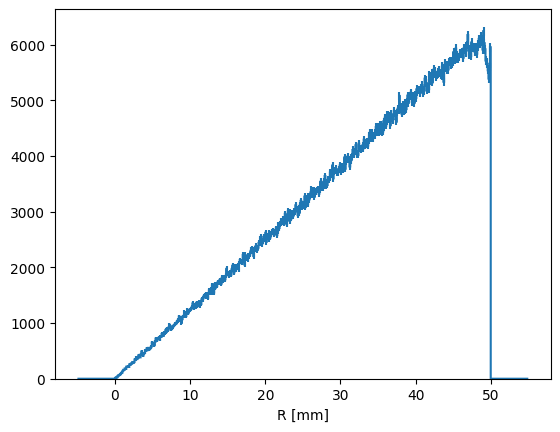

Number of bins: 600


In [9]:
# Lets view the ROOT histogram hitR.
hist_r = file[f"{detector}_hitR"]
hist_r.to_hist().plot()
plt.show()

print(f"Number of bins: {get_number_bins(hist_r, axis=0)}")

### View hitR2

<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Nevarias\AppData\Local\Temp\ipykernel_21832\1075433445.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.savefig(f"{save_dir}\hitr2_hist.png", bbox_inches="tight")


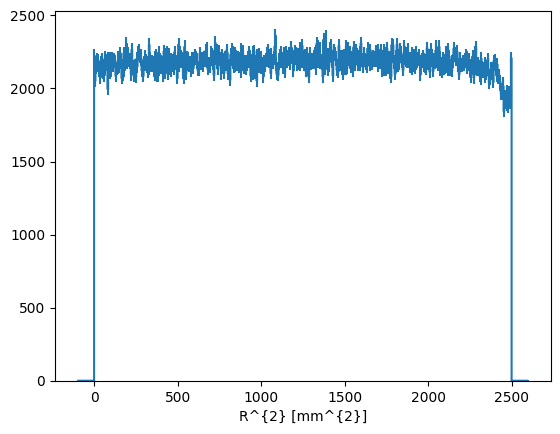

In [148]:
# Lets view the ROOT histogram hitR2.
hist_r2 = file[f"{detector}_hitR2"]
hist_r2.to_hist().plot()

plt.savefig(f"{save_dir}\hitr2_hist.png", bbox_inches="tight")
plt.show()

### View hitXY

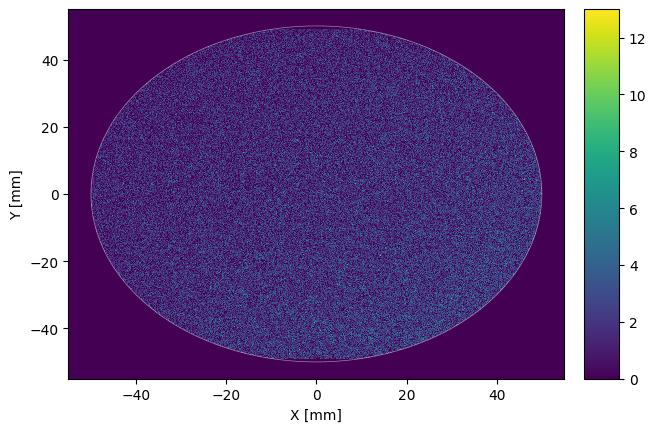

In [149]:
# Lets view the ROOT histogram hitXY.
hist_xy = file[f"{detector}_hitXY"]
hist_xy.to_hist().plot()

# Draw detector circle.
theta = np.linspace(0, 2*np.pi, 400)
plt.plot(
    DETECTOR_RADIUS * np.cos(theta),
    DETECTOR_RADIUS * np.sin(theta),
    color="white",
    linewidth=0.5,
    alpha=0.5,
    label="Detector boundary"
)

plt.show()


### View edepR

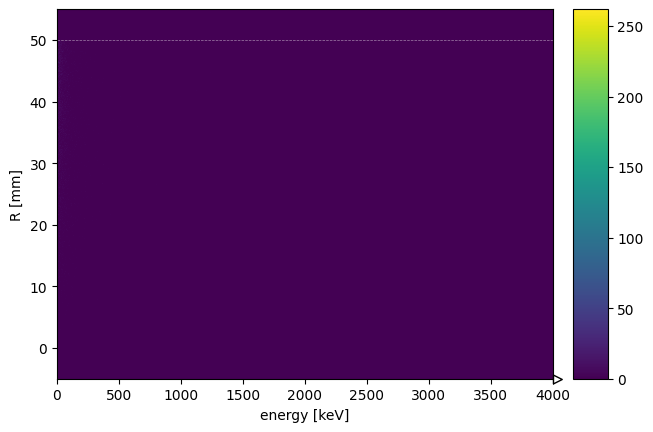

In [150]:
# Next edepR.
# Lets view the ROOT histogram edepR.
hist_edepR = file[f"{detector}_edepR"]
hist_edepR.to_hist().plot()

# Draw cutoff for detector radius.
plt.axhline(
    DETECTOR_RADIUS, 
    color="white", 
    linewidth=0.5, 
    linestyle="--",
    alpha=0.5,
    label="Detector radius"
)

plt.show()


### Radial rate in energy shells
Converts edepR (above) into many 1D histograms.

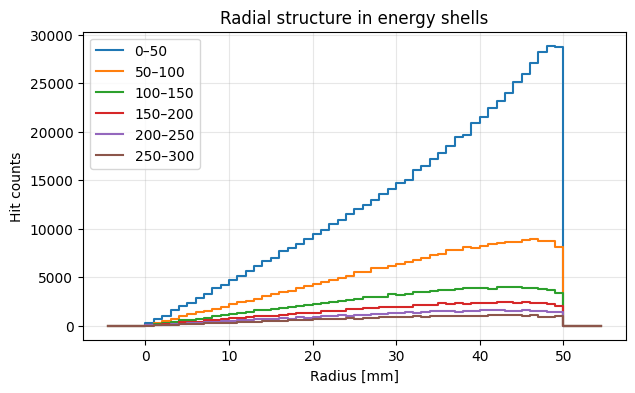

In [151]:
# Examine the radial rate in energy shells.
# Sums over radial bins (horizontal slices) within an energy range (vertical slice).

# Convert to Hist obejct so we can slice it using hist.
edeprHist = hist_edepR.to_hist()

# Existing bins are very fine/noisy, rebin.
edeprHist_rebinned = rebin_hist(
    edeprHist,
    factors={1: 10}
)

# Get 1D histograms in energy shells.
hist2d_to_hist1d_shells(
    edeprHist_rebinned,
    shell_axis=0,
    binned_axis=1,
    shell_min=0,
    shell_max=300,
    shell_step=50,
    xlabel="Radius [mm]",
    ylabel="Hit counts",
    title="Radial structure in energy shells",
    save_path=""
)


### View edepR2

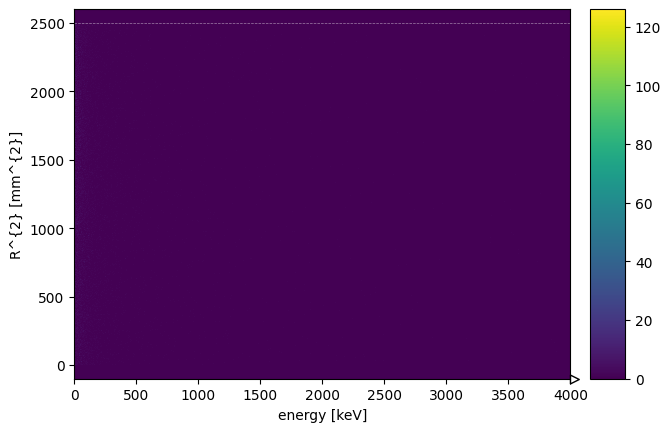

In [152]:
# Next edepR.
# Lets view the ROOT histogram edepR.
hist_edepR2 = file[f"{detector}_edepR2"]
hist_edepR2.to_hist().plot()

# Draw cutoff for detector radius^2.
plt.axhline(
    DETECTOR_RADIUS**2, 
    color="white", 
    linewidth=0.5, 
    linestyle="--",
    alpha=0.5,
    label="Detector radius"
)

plt.show()

### R2 rate in energy shells

<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:25: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Nevarias\AppData\Local\Temp\ipykernel_21832\867698096.py:25: SyntaxWarning: invalid escape sequence '\e'
  save_path=f"{save_dir}\edep_shells_r2_hist.png"


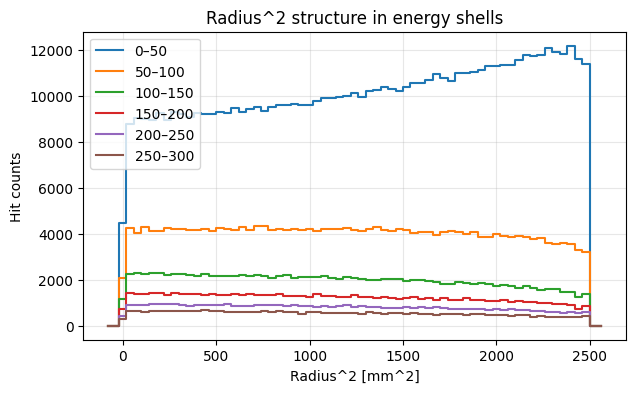

In [153]:
# Examine the radius^2 rate in energy shells.
# Sums over R2 bins (horizontal slices) within an energy range (vertical slice).

# Convert to Hist obejct so we can slice it using hist.
# Axes are 0: energy, 1: radius^2
edepr2Hist = hist_edepR2.to_hist()

# Existing bins are very fine/noisy, rebin.
edepr2Hist_rebinned = rebin_hist(
    edepr2Hist,
    factors={1: 10}
)

# Get 1D histograms in energy shells.
hist2d_to_hist1d_shells(
    edepr2Hist_rebinned,
    shell_axis=0,
    binned_axis=1,
    shell_min=0,
    shell_max=300,
    shell_step=50,
    xlabel="Radius^2 [mm^2]",
    ylabel="Hit counts",
    title="Radius^2 structure in energy shells",
    save_path=f"{save_dir}\edep_shells_r2_hist.png"
)

### Visualize azimuthal hit density

In [154]:
# Extract counts in xy bins.
counts = hist_xy.values()
x_edges = hist_xy.axis(0).edges()
y_edges = hist_xy.axis(1).edges()

# Bin centers.
x_centers = 0.5 * (x_edges[:-1] + x_edges[1:])  # (x-low + x-high) / 2
y_centers = 0.5 * (y_edges[:-1] + y_edges[1:])  # (y-low + y-high) / 2


In [155]:
# Make a 2D grid of x-centers x y-centers.
X, Y = np.meshgrid(x_centers, y_centers, indexing="ij")

# Calculate azimuthal angle at each point.
phi = np.arctan2(Y, X)   # range: [-pi, pi]

# Convert XY grid to radius and radius^2 grid. Assume units are millimeters.
r = np.sqrt(X**2 + Y**2)
print(r.min(), r.max())

# Not all radii will be physical. The radius of the detectors is 50mm, but the corners of the XY grid will give radii that exceed 50mm since it allows all combinations resulting in a square instead of a circle. A small amount of counts may bleed into these extreme XY bins.
# Ensure that a mask limiting the radii allowed is added when accumulating phi counts.
physical_radius_mask = (r <= DETECTOR_RADIUS)

r2 = r**2
print(r2.min(), r2.max())

0.07071067811865074 77.71103525240157
0.004999999999999433 6039.005


<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Nevarias\AppData\Local\Temp\ipykernel_21832\1572078982.py:28: SyntaxWarning: invalid escape sequence '\p'
  plt.savefig(f"{save_dir}\phi_hist.png", bbox_inches="tight")


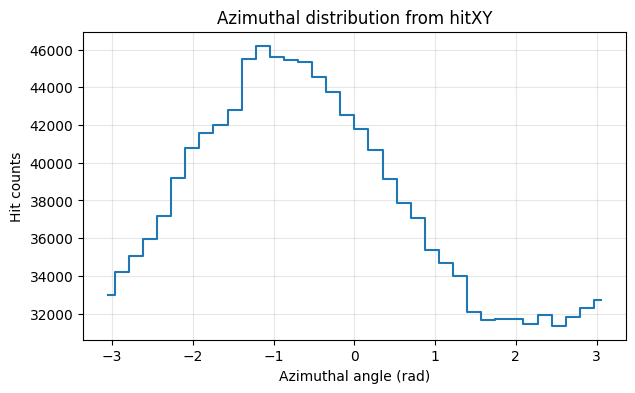

In [156]:
# Plot azimuthal count density.
# Helps clearly define direction of source, but is otherwise a reflection of what we learn from hitXY.

# Create phi bins.
n_phi_bins = 36
phi_edges = np.linspace(-np.pi, np.pi, n_phi_bins + 1)
phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])

phi_counts = np.zeros(n_phi_bins)

# For each phi bin, sum all XY hits from counts grid that evaluate to within edges of phi bin and dont exceed the physical radius.
for i in range(n_phi_bins):
    mask = (
        physical_radius_mask &
        (phi >= phi_edges[i]) & 
        (phi < phi_edges[i+1])
    )
    phi_counts[i] = counts[mask].sum()

# Plot phi histogram.
plt.figure(figsize=(7,4))
plt.step(phi_centers, phi_counts, where="mid")
plt.xlabel("Azimuthal angle (rad)")
plt.ylabel("Hit counts")
plt.title("Azimuthal distribution from hitXY")
plt.grid(True, alpha=0.3)

plt.savefig(f"{save_dir}\phi_hist.png", bbox_inches="tight")
plt.show()

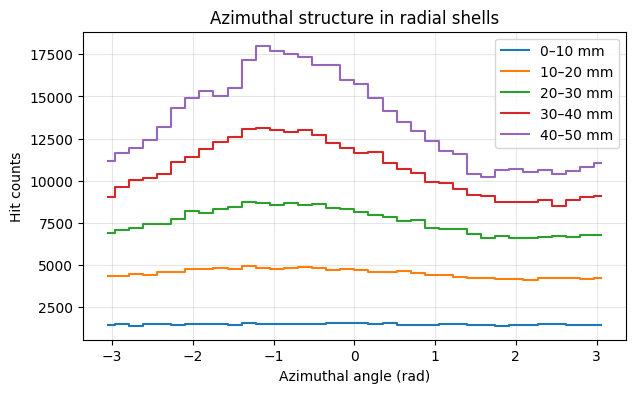

In [157]:
# Examine the azimuthal density in radial shells.
# This is another way to look at hit density in R, with dependence on XY (or phi) position.

r_bins = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]
colors = ["C0", "C1", "C2", "C3", "C4"]

plt.figure(figsize=(7,4))

# For each radial shell, get counts in phi bins.
for (rmin, rmax), c in zip(r_bins, colors):
    phi_counts_r = np.zeros(n_phi_bins)
    r_mask = (r >= rmin) & (r < rmax)

    for i in range(n_phi_bins):
        phi_mask = (
            (phi >= phi_edges[i]) & 
            (phi < phi_edges[i+1])
        )
        phi_counts_r[i] = counts[r_mask & phi_mask].sum()

    # Plot the histogram of phi counts per radial shell.
    plt.step(phi_centers, phi_counts_r, where="mid",
             label=f"{rmin}–{rmax} mm", color=c)

plt.xlabel("Azimuthal angle (rad)")
plt.ylabel("Hit counts")
plt.legend()
plt.title("Azimuthal structure in radial shells")
plt.grid(True, alpha=0.3)
plt.show()

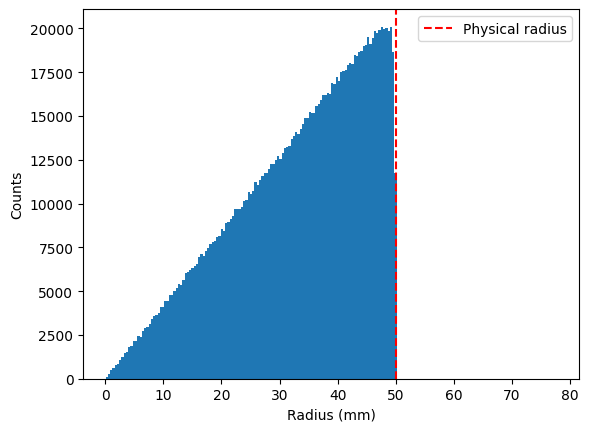

In [158]:
# Another way to plot radial rate (instead of straight from hitr histogram file) is to extract it from hitXY.
plt.hist(r.flatten(), weights=counts.flatten(), bins=200)
plt.axvline(DETECTOR_RADIUS, color="red", linestyle="--", label="Physical radius")
plt.xlabel("Radius (mm)")
plt.ylabel("Counts")
plt.legend()
plt.show()

### View NR and ER distributions

Number of bins: 400


<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Nevarias\AppData\Local\Temp\ipykernel_33576\734320124.py:13: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig(f"{save_dir}\edep_nr_hist.png", bbox_inches="tight")


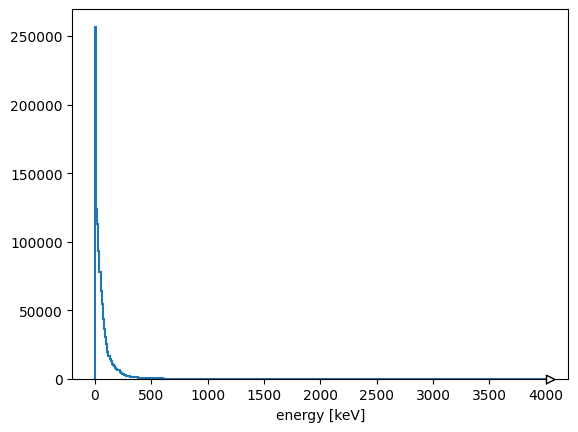

In [ ]:
# Examine number of NR events
hist_edep_nr = file[f"{detector}_edep_NR"]
edepNRHist = hist_edep_nr.to_hist()

edepNRHist_rebinned = rebin_hist(
    edepNRHist,
    factors={0: 1000}
)

print(f"Number of bins: {get_number_bins(edepNRHist_rebinned, axis=0)}")

edepNRHist_rebinned.plot()
plt.savefig(f"{save_dir}\edep_nr_hist.png", bbox_inches="tight")
plt.show()

Number of bins: 400


<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Nevarias\AppData\Local\Temp\ipykernel_33576\2607960563.py:13: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig(f"{save_dir}\edep_er_hist.png", bbox_inches="tight")


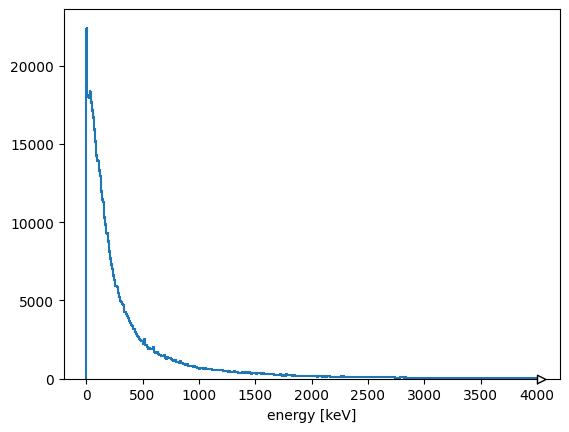

In [ ]:
# Examine number of ER events
hist_edep_er = file[f"{detector}_edep_ER"]
edepERHist = hist_edep_er.to_hist()

edepERHist_rebinned = rebin_hist(
    edepERHist,
    factors={0: 1000}
)

print(f"Number of bins: {get_number_bins(edepERHist_rebinned, axis=0)}")

edepERHist_rebinned.plot()
plt.savefig(f"{save_dir}\edep_er_hist.png", bbox_inches="tight")
plt.show()